<a href="https://colab.research.google.com/github/bluepeach1121/Pytorch_tutorials/blob/main/01pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to the data',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #contains all of pythons building blocks for ML
import matplotlib.pyplot as plt


1. convert data into numerical format
2. build a model to learn pattern in numbers
*lets create a model with linear regression*
we'll use a linear regression formula to make a straight line with known parameters

In [3]:
#create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02 #learning rate
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting data into training and test sets (one of the most important concepts in ML/ data science)

In [4]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize data.

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    plots training data, test data nad compares predictions.
    """

    plt.figure(figsize=(10, 7))

    #plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="training data")

    #plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    #are there predictions?
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    #show the legend
    plt.legend(prop={'size': 14})



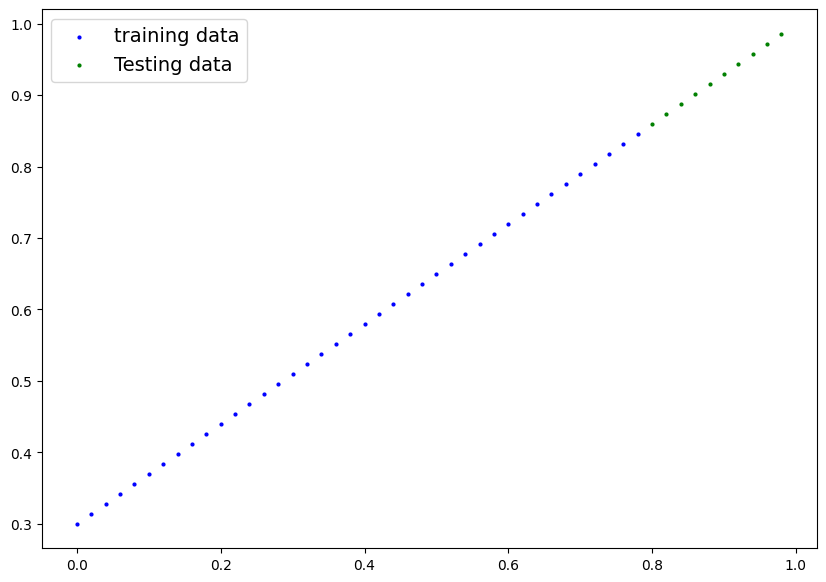

In [6]:
plot_predictions();

we are going to build a model to predict future values

## 2. build model

our first pytorch model

what our model does:
* start with random values (weight & bias)
* look at training data and adjust the random values to better represent the ideal values used to create the data.

How does it do so?
through 2 main algorithms:
1. gradient descent
2. backpropagation

**note:** `nn.Module` is a subclass. `forward(*input)` defines the computation performed at every cell. any subclass of `nn.module` needs to override `forward()`

#pytorch model building essentials

* torch.nn --> contains all of the building blocks for computational graphs
* torch.nn.parameter - what parameters should our model try to learn, often a pytorch layer from torch.nn will set these for us.
* torch.nn.Module -- the base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim -- this is where the optimizers in pytorch are, they help with gradient descent.
* def forward() --> all nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### checking the contents of our pytorch model
 * we can our model parameters or whats inside our model using `nn.parameter()`.


In [7]:
import torch
from torch import nn

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to ad
                                                requires_grad=True,
                                                dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    #forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Set the random seed
torch.manual_seed(42)

# Instantiate the model
model_0 = LinearRegressionModel()

# Print the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# making prediction using `torch.inference_mode()`
to check our model's predictive power, lets see how well it predicts `y_test` based on `X_test`

when we pass data through our model, its going to run it through the `forward()` method

In [9]:
print(f"{X_test} {y_test}")

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [10]:
#make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test) #takes in X_test as inputs and returns y_test

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

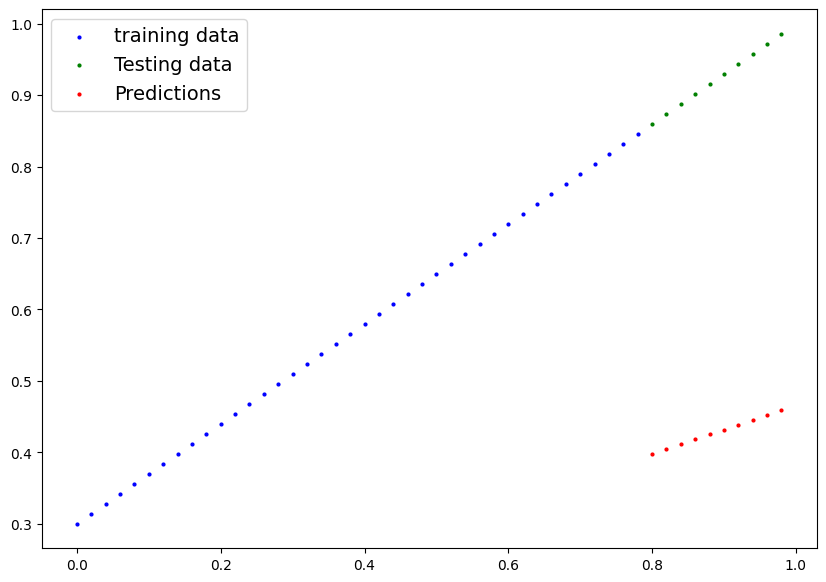

In [12]:
plot_predictions(predictions= y_preds)

## Train model

the whole idea of training a model is to move from some **unknown** parameters (values) to a more accurate prediction. an ideal model model would move from random values to the perfect parameters.

## loss fucntion
one way to measure how poor or how wrong our model is, is to use a loss function. loss functions may be also called cost functions or criterion in differen areas.

##optimizer
takes into account the loss of a model and adjusts the model's paramters (i.e weights and biases) to improve the loss function.

* inside the optimizer you'll often have to set 2 parameters:
    * `params` - the model parameters you'd like to optimize, e.g `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step.


*for pytorch, we need*
* A training loop
* A testing loop



In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
#setup a loss funtion
loss_fn = nn.L1Loss()


#setup and optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01) #learning rate is one of the most important hyperparameter you can set


### building a training loop and a testing loop in Pytorch

1. Loop through the data
2. Forward pass --> this nvolves data moving through our model's `forward()` function --> also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backwards -->move backwards through the network to calculate the gradients of the loss and provide the feedback to the model using mathematical methods. **BACKPROPAGATION**
5. optimizer step

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [18]:
torch.manual_seed(42)

# an epoch is one loop through the data... ( this is a hyperparameter bcuz we set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### training
#0 Loop through the data
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

    #1. forward pass
    y_pred = model_0(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train)


    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    #5. step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop... so

    ### testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking
    #with torch.no_grad(): # you may see torch.no_grad() in older pytorch code
        #1. do the forward pass
        test_pred = model_0(X_test)

        #2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    #print out whats happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'epoch: {epoch} <--> loss: {loss} <--> test loss: {test_loss} ')

print(model_0.state_dict()) # turns off gradient tracking

epoch: 0 <--> loss: 0.31288138031959534 <--> test loss: 0.48106518387794495 
epoch: 10 <--> loss: 0.1976713240146637 <--> test loss: 0.3463551998138428 
epoch: 20 <--> loss: 0.08908725529909134 <--> test loss: 0.21729660034179688 
epoch: 30 <--> loss: 0.053148526698350906 <--> test loss: 0.14464017748832703 
epoch: 40 <--> loss: 0.04543796554207802 <--> test loss: 0.11360953003168106 
epoch: 50 <--> loss: 0.04167863354086876 <--> test loss: 0.09919948130846024 
epoch: 60 <--> loss: 0.03818932920694351 <--> test loss: 0.08886633068323135 
epoch: 70 <--> loss: 0.03476089984178543 <--> test loss: 0.0805937647819519 
epoch: 80 <--> loss: 0.03132382780313492 <--> test loss: 0.07232122868299484 
epoch: 90 <--> loss: 0.02788739837706089 <--> test loss: 0.06473556160926819 
epoch: 100 <--> loss: 0.024458957836031914 <--> test loss: 0.05646304413676262 
epoch: 110 <--> loss: 0.021020207554101944 <--> test loss: 0.04819049686193466 
epoch: 120 <--> loss: 0.01758546568453312 <--> test loss: 0.040

In [19]:
test_loss_values

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

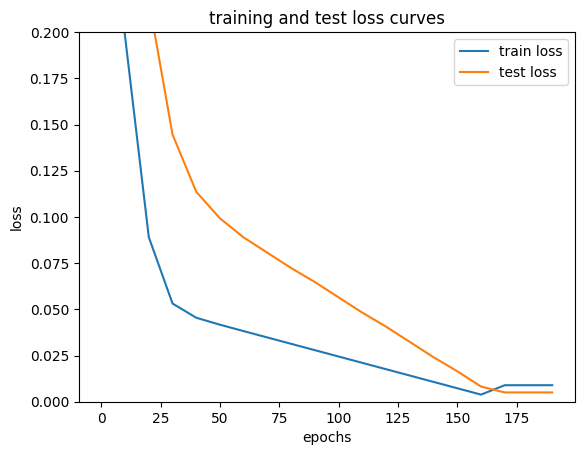

In [20]:
import numpy as np
#plt the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'train loss')
plt.plot(epoch_count, test_loss_values, label='test loss')
plt.title('training and test loss curves')
plt.ylabel('loss')
plt.ylim(0, 0.2)
plt.xlabel('epochs')
plt.legend();

In [21]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

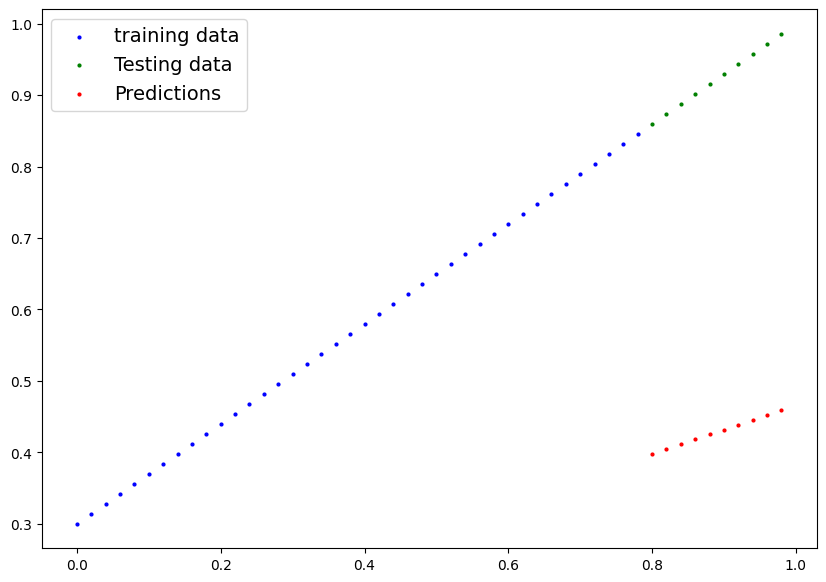

In [22]:
plot_predictions(predictions=y_preds);

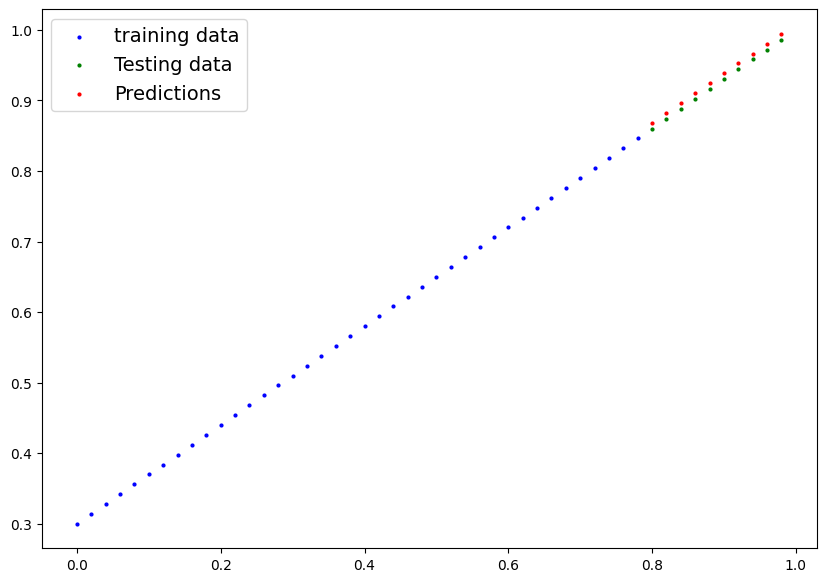

In [23]:
plot_predictions(predictions= y_pred_new);

# saving a model in Pytorch

there are 3 main methods for saving and loading models in pytorch.

1. `torch.save` - allows you save a pytorch object in python's pickle format
2. `torch.load` - allows you load a saved Pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [24]:
#saving our pytorch model
from pathlib import Path as path

# 1. create models directory
MODEL_PATH = path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True) #mkdir --> make directory

#2. create model save path
MODEL_NAME ='01_pytorch_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(),
           f = MODEL_SAVE_PATH)


saving model to: models/01_pytorch_model_0.pth


In [25]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1562 Jun  1 22:42 01_pytorch_model_0.pth


## loading a pytorch model
since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
#to load in a saved state_dict we have to instantiate a new instance of out model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict of model_0 (this will update the new instances with updated parameters)
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
#make some predictions with out loaded model

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
#make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds == model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [31]:
#compares loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

## 6. puttin it all together

lets go back through all the steps and see it all in one place

In [32]:
# import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt


create device-agnostic code.
this means if we've got access to a GPU, our code will use it

In [35]:
#setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'we are operating on--> {device}')

we are operating on--> cuda


In [36]:
!nvidia-smi

Sat Jun  1 22:43:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###data creation

In [94]:
#create some data using the regression formula of y = weight * X + bias
weight = 0.8
bias = 0.2

#create range value
start = 0
end = 1
step = 0.02
 #create X and y (feature and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

In [95]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

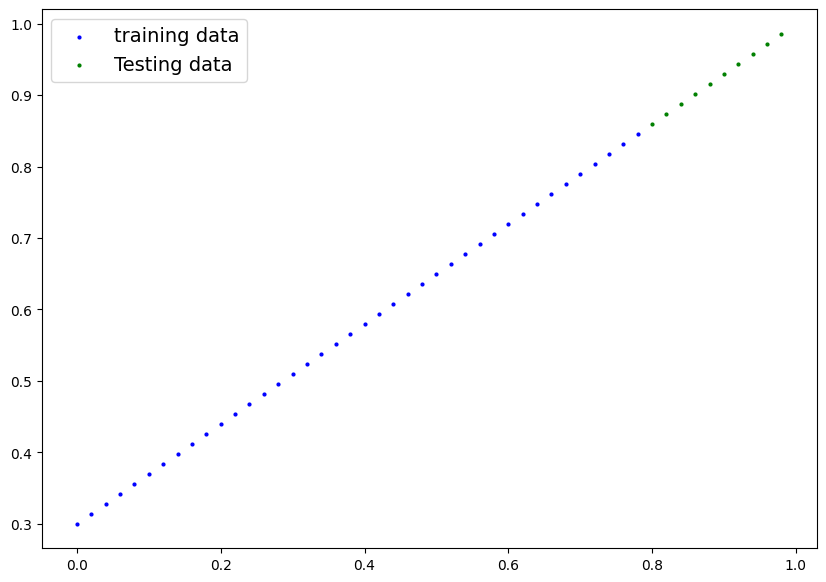

In [96]:
#plot the data
plot_predictions()

##6.2 building a pytorch linear model


In [97]:
#creat a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.linear() for creating the model paramters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [98]:
#check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [99]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 training

for training, we need:

    *Loss function
    *optimizer
    *training loop
    *testing loop

In [100]:
# setup loss function
loss_fn = nn.L1Loss() # same as MAE

#setup our optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr = 0.01)


In [101]:
#lets write a training loop
torch.manual_seed(42)

epochs = 200

#put data on the target data (put data on the same device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
y_train = y_train.to(device)


for epoch in range(epochs):
    model_1.train()

    #1. forward pass
    y_pred = model_1(X_train)

    # calculate the loss
    loss = loss_fn(y_pred, y_train)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. back propagation
    loss.backward()

    # optimize step
    optimizer.step()

    #testing.
    model_1.eval()
    with torch.inference_mode(): # turns out gradient tracking
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    #print out whats happening
    if epoch % 10 == 0:
        print(f'epoch: {epoch} <--> loss: {loss} <--> test-loss: {test_loss}')

epoch: 0 <--> loss: 0.6161779165267944 <--> test-loss: 0.5849762558937073
epoch: 10 <--> loss: 0.5009680986404419 <--> test-loss: 0.45026642084121704
epoch: 20 <--> loss: 0.3857581913471222 <--> test-loss: 0.3155565857887268
epoch: 30 <--> loss: 0.2705483138561249 <--> test-loss: 0.180846706032753
epoch: 40 <--> loss: 0.15533843636512756 <--> test-loss: 0.046136897057294846
epoch: 50 <--> loss: 0.05875825881958008 <--> test-loss: 0.06886561214923859
epoch: 60 <--> loss: 0.04580378159880638 <--> test-loss: 0.09473040699958801
epoch: 70 <--> loss: 0.041819483041763306 <--> test-loss: 0.09405827522277832
epoch: 80 <--> loss: 0.03831038996577263 <--> test-loss: 0.08853326737880707
epoch: 90 <--> loss: 0.034879546612501144 <--> test-loss: 0.08094760775566101
epoch: 100 <--> loss: 0.03144557774066925 <--> test-loss: 0.07267507165670395
epoch: 110 <--> loss: 0.028006771579384804 <--> test-loss: 0.06440252810716629
epoch: 120 <--> loss: 0.024577612057328224 <--> test-loss: 0.056816864758729935

In [102]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [103]:
#turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds # we evaluate on the test data

tensor([[0.8484],
        [0.8644],
        [0.8804],
        [0.8964],
        [0.9123],
        [0.9283],
        [0.9443],
        [0.9603],
        [0.9762],
        [0.9922]], device='cuda:0')

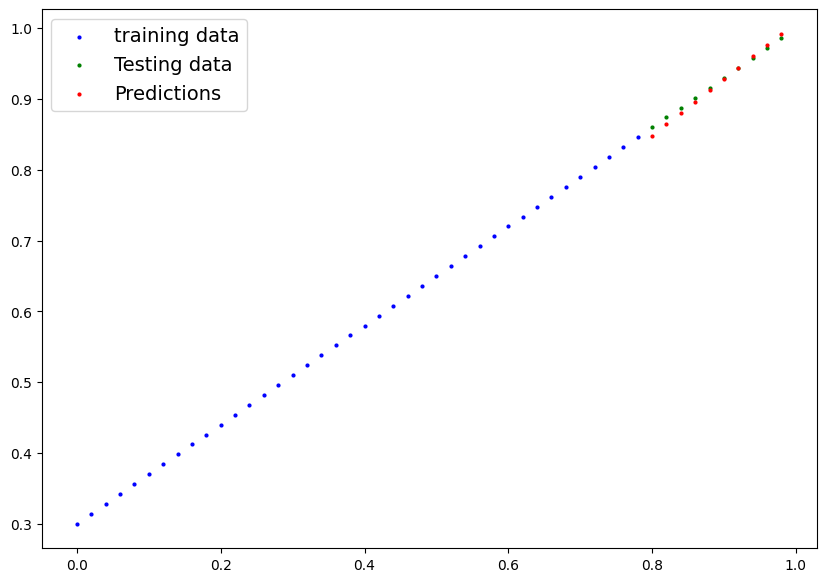

In [104]:
#check out our model predictabilty
plot_predictions(predictions = y_preds.cpu())

### saving and loading model

In [108]:
from pathlib import Path as path

#1. create  models directory
MODEL_PATH = path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. creat model save path
MODEL_NAME = '01_pytorch_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to: models/01_pytorch_model_1.pth


In [109]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [112]:
#load a pytorch model

#create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

#load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [113]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [114]:
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')